In [1]:
pip install matplotlib --force-reinstall --user

  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached numpy-1.22.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.0.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\navee\\AppData\\Roaming\\Python\\Python38\\site-packages\\~il\\_imaging.cp38-win_amd64.pyd'
Check the permissions.



In [2]:
pip install scikit-learn -

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '-'


In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df['quality'].nunique()

6

In [12]:
df.loc[df['quality']==" "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [13]:
df["quality"]=df["quality"].replace(" ",np.nan)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df["quality"]=df["quality"].astype(object)

In [16]:
df["quality"]=df["quality"].fillna(np.mean(df["quality"]))

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df_visualization_nominal=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].copy()

In [19]:
df_visualization_nominal.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
len(df.columns)

12

In [21]:
len(df_visualization_nominal.columns)

12

# Visualization of the data

In [22]:
import seaborn as sns

In [23]:
sns.countplot##shift and  tab

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
4.6      1
13.5     1
4.9      1
15.9     1
14.3     1
Name: fixed acidity, Length: 96, dtype: int64


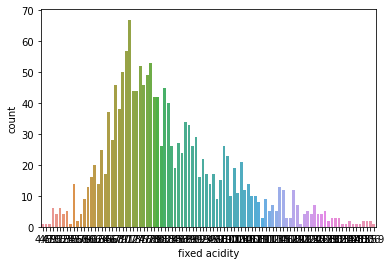

In [24]:
ax = sns.countplot(x="fixed acidity",data=df_visualization_nominal)
print(df_visualization_nominal["fixed acidity"].value_counts())

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
0.975     1
0.845     1
0.865     1
1.180     1
1.115     1
Name: volatile acidity, Length: 143, dtype: int64


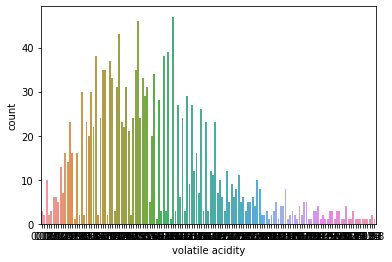

In [25]:
ax = sns.countplot(x="volatile acidity",data=df_visualization_nominal)
print(df_visualization_nominal["volatile acidity"].value_counts())

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64


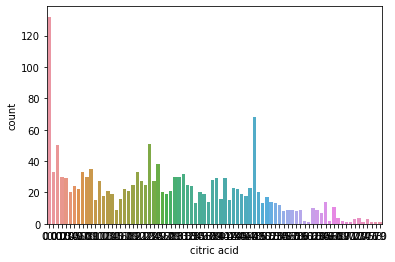

In [26]:
ax = sns.countplot(x="citric acid",data=df_visualization_nominal)
print(df_visualization_nominal["citric acid"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


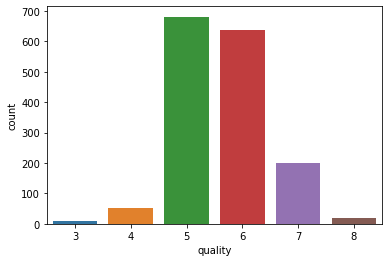

In [27]:
ax = sns.countplot(x="quality",data=df_visualization_nominal)
print(df_visualization_nominal["quality"].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.86     1
3.75     1
2.74     1
2.90     1
3.74     1
Name: pH, Length: 89, dtype: int64


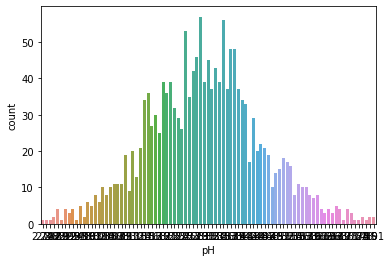

In [28]:
ax = sns.countplot(x="pH",data=df_visualization_nominal)
print(df_visualization_nominal["pH"].value_counts())

9.50     139
9.40     103
9.80      78
9.20      72
10.50     67
        ... 
9.05       1
13.50      1
10.75      1
11.95      1
9.25       1
Name: alcohol, Length: 65, dtype: int64


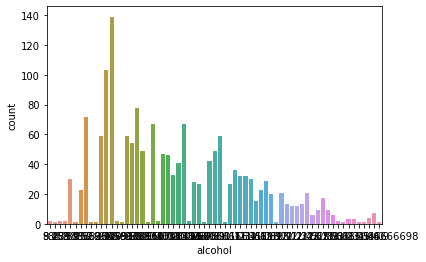

In [29]:
ax = sns.countplot(x="alcohol",data=df_visualization_nominal)
print(df_visualization_nominal["alcohol"].value_counts())

# Checking  the distibution of the continous value of the float type columns

In [30]:
df_visualization_continous = df[["quality","pH"]].copy()

<AxesSubplot:xlabel='pH', ylabel='Density'>

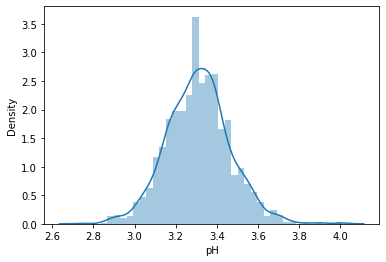

In [31]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_visualization_continous['pH'],kde=True)

<AxesSubplot:xlabel='quality', ylabel='Density'>

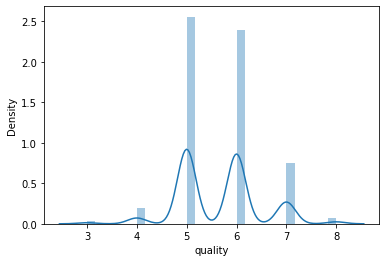

In [32]:

sns.distplot(df_visualization_continous['quality'],kde=True)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
enc=OrdinalEncoder()

In [35]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

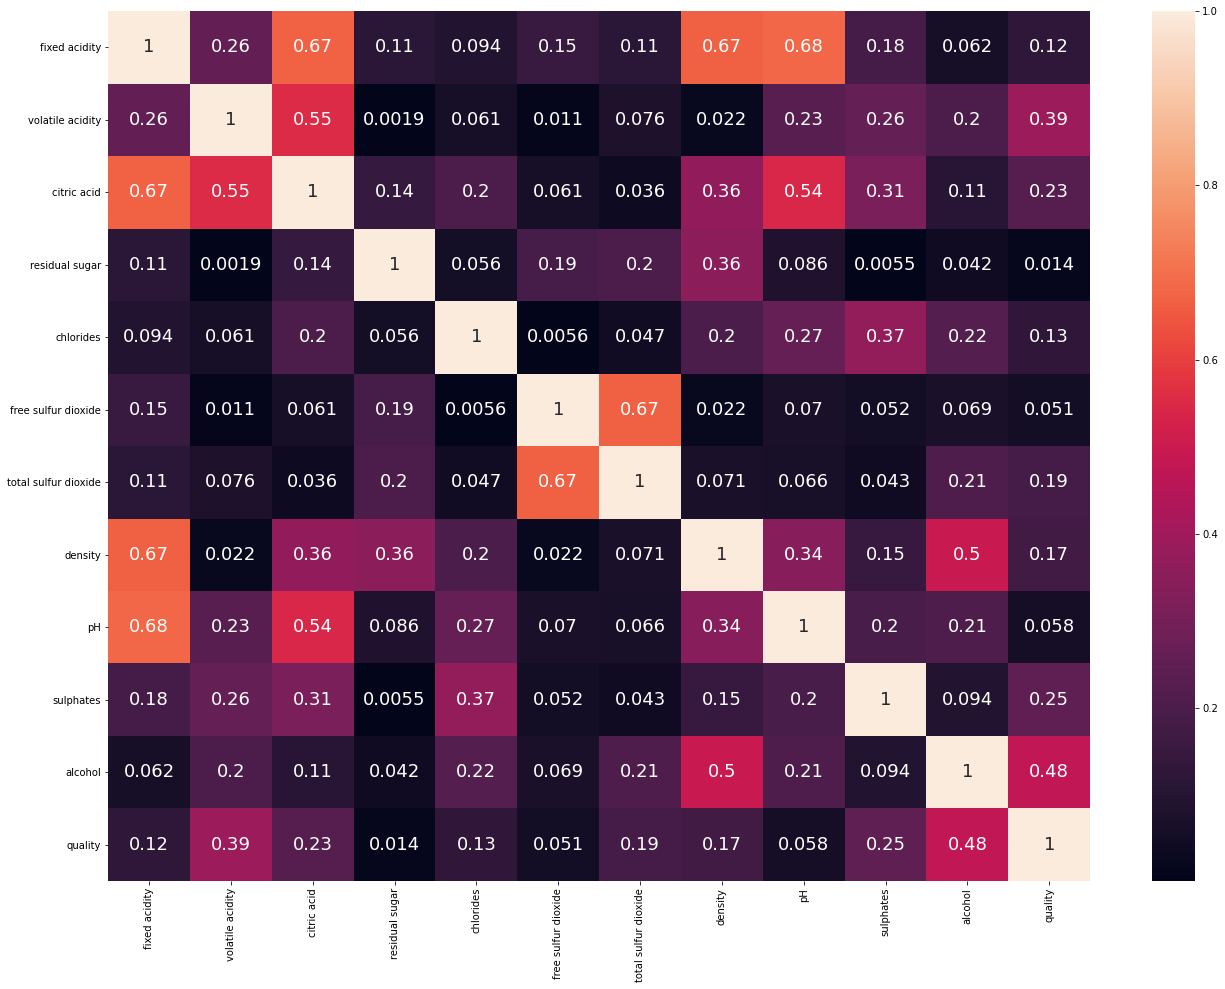

In [39]:
df_corr = df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':18})
plt.show()

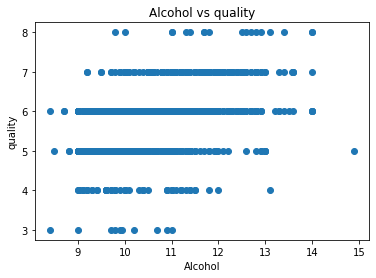

In [40]:
plt.scatter(df.alcohol,df.quality)
plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.title('Alcohol vs quality')
plt.show()

In [41]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [42]:
x = df.drop(columns = ['quality','alcohol'])
y = df['quality']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 41)

In [44]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

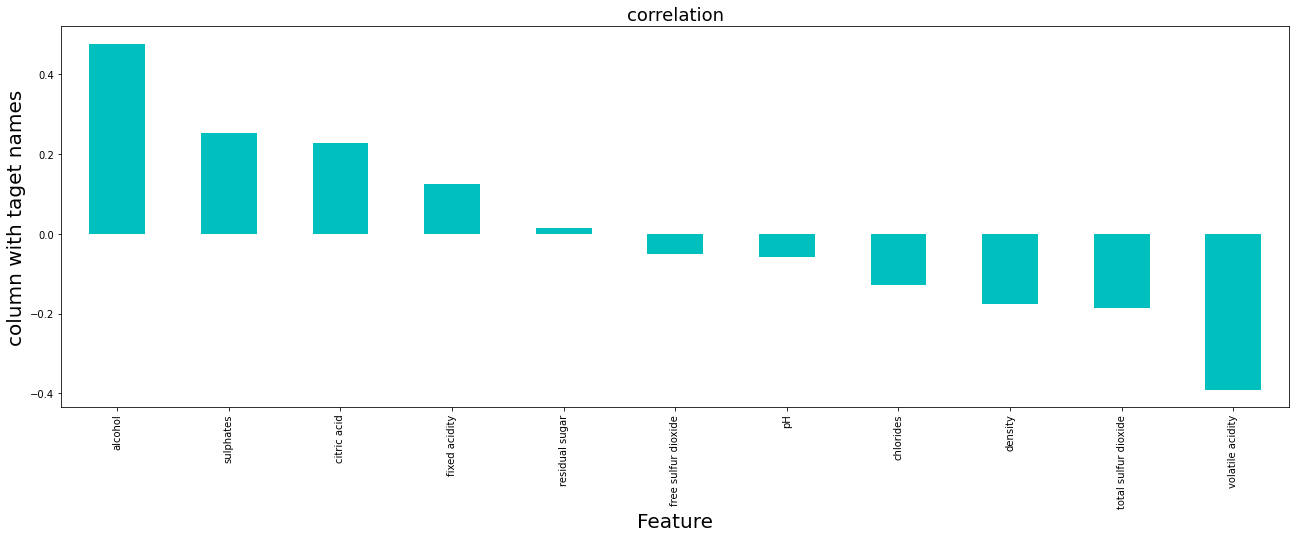

In [46]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('column with taget names',fontsize=20)
plt.title('correlation',fontsize=18)
plt.show()

In [47]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [48]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<AxesSubplot:>

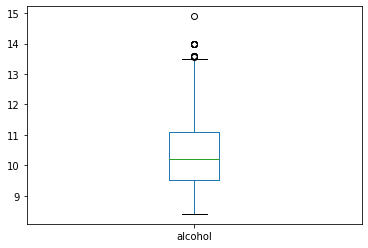

In [49]:
df['alcohol'].plot.box()

<AxesSubplot:>

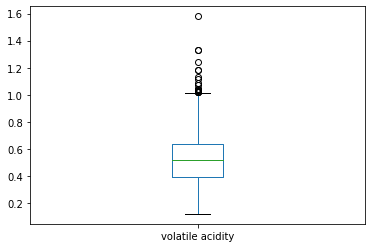

In [50]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

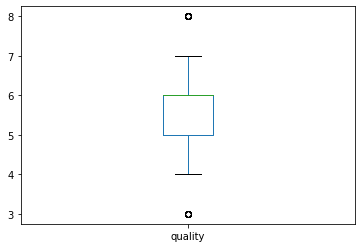

In [51]:
df['quality'].plot.box()

<AxesSubplot:>

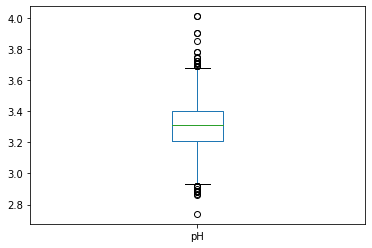

In [52]:
df['pH'].plot.box()

In [53]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [54]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [55]:
df.shape

(1599, 12)

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [57]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
df_new_z.shape

(1451, 12)

In [59]:
#percentage of loss data
Data_loss=((1599-1451)/1599)*100

In [60]:
Data_loss

9.255784865540964

# seperating the columns into features and target:

In [61]:
features=df.drop("quality",axis=1)
target=df["quality"]

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:
import warnings 
warnings.filterwarnings('ignore')

In [64]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state{i},the training accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.3654519616206865
At random state0,the training accuracy is:-0.3283887639580212


At random state1,the training accuracy is:-0.3655849921479042
At random state1,the training accuracy is:-0.32664027269868334


At random state2,the training accuracy is:-0.3707977009866663
At random state2,the training accuracy is:-0.30243886973915424


At random state3,the training accuracy is:-0.3530297271672961
At random state3,the training accuracy is:-0.3869039632632527


At random state4,the training accuracy is:-0.36362946599677437
At random state4,the training accuracy is:-0.33695002513698635


At random state5,the training accuracy is:-0.35360876598214463
At random state5,the training accuracy is:-0.37874687431635334


At random state6,the training accuracy is:-0.35173920943199877
At random state6,the training accuracy is:-0.3894742190108451


At random state7,the training accuracy is:-0.35997491908932233
At random state7,the training accuracy is:-0.346

In [65]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [66]:
lr.fit(features_train,target_train)

LinearRegression()

In [67]:
pred_test=lr.predict(features_test)

In [68]:
print(r2_score(target_test,pred_test))

0.3193695830806873


# Cross-validation of the model:

In [69]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accracy for the testing")
    print("\n")

At cross fold 2 the cv score is 0.2848257660293023 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 3 the cv score is 0.3115745778424807 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 4 the cv score is 0.2871973003054057 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 5 the cv score is 0.29004162884219675 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 6 the cv score is 0.2345495739383018 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 7 the cv score is 0.24947349742144828 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 8 the cv score is 0.21815114893495 and accuracy score for training is -0.35213486056219856 and accracy for the testing


At cross fold 9 the cv score is 0.2376393

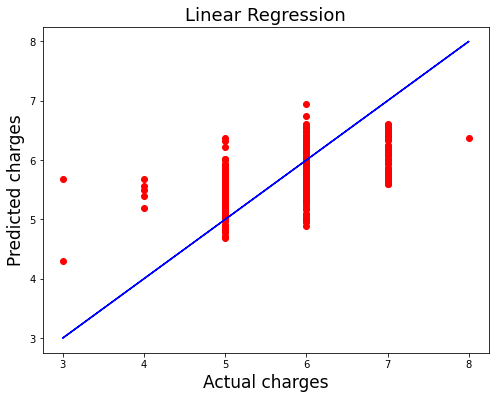

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=17)
plt.ylabel('Predicted charges',fontsize=17)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [72]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [73]:
from sklearn import linear_model

In [75]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [78]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.3185378066765556

In [79]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.29118657767063333

# Ensemble technique

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [83]:
rf = RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfsscore =  cross_val_score(rf,features,target,cv=5)
rfs = rfsscore.mean()
print('Cross Val Score:',rfs*100)

R2 Score: 45.85461510586531
Cross Val Score: 31.034784829765062


In [84]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion

In [86]:
loaded_model = pickle.load(open('churn.pkl','rb'))
result = loaded_model.score(features_test,target_test)
print(result)

0.45854615105865304


In [87]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [88]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
Predicted,5.46,5.53,5.79,5.06,5.64,5.32,5.39,5.54,5.54,6.66,...,5.55,5.25,5.05,4.81,6.05,5.03,6.29,6.49,5.8,5.75
Orginal,5.46,5.53,5.79,5.06,5.64,5.32,5.39,5.54,5.54,6.66,...,5.55,5.25,5.05,4.81,6.05,5.03,6.29,6.49,5.8,5.75
